In [1]:
import numpy as np
import random
from mlxtend.evaluate import permutation_test
import ndtest
from transformers import set_seed
from scipy import stats

GENERAL_SEED = 42
set_seed(GENERAL_SEED)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## load Data

In [3]:
full_dataset_df = pd.read_csv(
    "Wiki_no_title_reduced_DreamBank_reduced_en_pptx_multiGPT.csv"
)

full_dataset_df.sample(3)

,Unnamed: 0,Text,No.Words,Data,Type,series,gender,year,gpt2_perplexities,gpt2-medium_perplexities,gpt2-large_perplexities,gpt2-xl_perplexities,OLMo-1B_perplexities,OLMo-7B_perplexities
15615,3378,"In May 1944 , Nos. 1 , 18 and 31 Squadrons at...",114,WikiText2,Content,wiki,UNK,UNK,55.856674,40.369308,33.497643,31.550827,30.345722,16.885992
21483,13654,"His family had no theatrical connections , bu...",248,WikiText2,Content,wiki,UNK,UNK,27.783510,21.015368,17.232039,14.623804,10.786925,8.156730
1456,6620,My husband is taking me to a football game her...,151,DreamBank,Content,melora,female,1962,24.872400,20.293655,18.972975,16.183292,15.537843,13.030560


In [4]:
mdl_prmtrs_dct = {
    'gpt2': 137,
    'gpt2-medium': 380,
    'gpt2-large': 812,
    'gpt2-xl': 1610,
    'OLMo-1B': 1180,
    'OLMo-7B': 6890,
}

mdl_nms_dct = {
    'gpt2': 'GPT2',
    'gpt2-medium': 'GPT2-Medium',
    'gpt2-large': 'GPT2-Large',
    'gpt2-xl': 'GPT2-XL',
    'OLMo-1B': 'OLMo-1B',
    'OLMo-7B': 'OLMo-7B',
}

mdl_ppl_org = {
    'gpt2': 29.41,
    'gpt2-medium': 22.76,
    'gpt2-large': 19.93,
    'gpt2-xl': 18.34
}

## Single-text perplexity

In [5]:
data_nw_p = permutation_test(
    full_dataset_df[full_dataset_df["Data"].isin(["WikiText2"])]["No.Words"],
    full_dataset_df[full_dataset_df["Data"].isin(["DreamBank"])]["No.Words"],
    method='approximate',
    num_rounds=10000,
    seed=0
)

data_nw_p

9.999000099990002e-05

In [6]:
SAVE_images = True

/tmp/ipykernel_1666/659701153.py:11: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend("center", labels=["WikiText2", "DreamBank"], frameon=False)


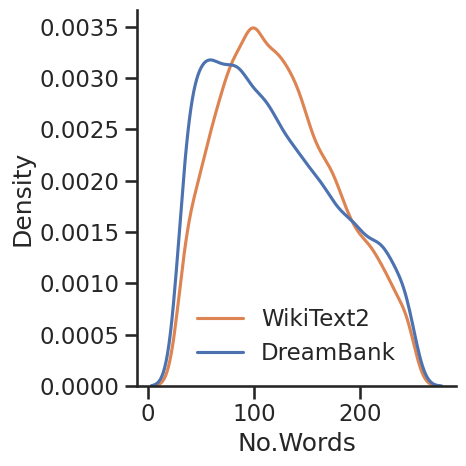

In [7]:
sns.set_theme(context='talk', style='ticks')

g = sns.displot(
    data=full_dataset_df,
    x="No.Words",
    hue="Data",
    kind="kde",
    legend=None,
)

plt.legend("center", labels=["WikiText2", "DreamBank"], frameon=False)

/tmp/ipykernel_1666/4249818117.py:12: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend("center", labels=["WikiText2", "DreamBank"], frameon=False)


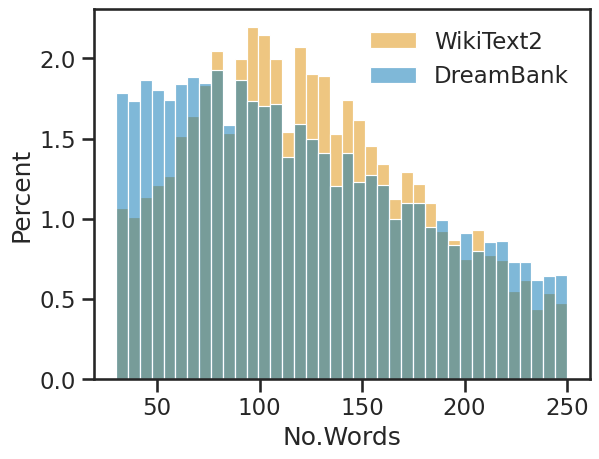

In [8]:
sns.set_theme(context='talk', style='ticks')

g = sns.histplot(
    data=full_dataset_df,
    x="No.Words",
    hue="Data",
    legend=None,
    stat='percent',
    palette='colorblind'
)

plt.legend("center", labels=["WikiText2", "DreamBank"], frameon=False)

if SAVE_images:
    plt.savefig(
        "Images/wiki_vs_db_len_hist.pdf",
        dpi=400,
        bbox_inches='tight'
    )

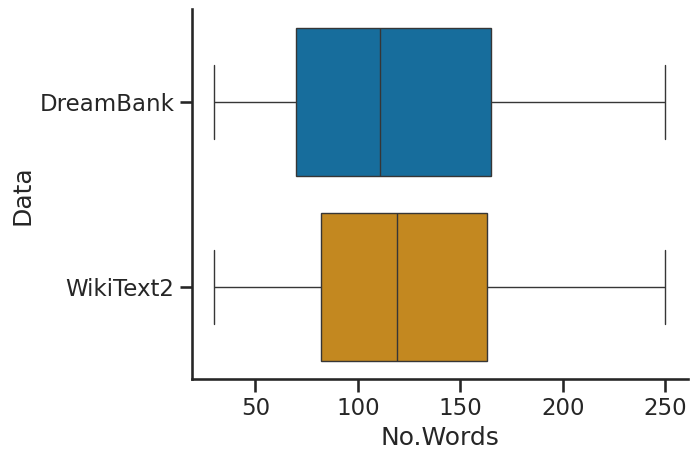

In [9]:
sns.set_theme(context='talk', style='ticks')

g = sns.boxplot(
    data=full_dataset_df,
    x="No.Words",
    y="Data",
    hue="Data",
    palette='colorblind'
)

sns.despine()

if SAVE_images:
    plt.savefig(
        "Images/wiki_vs_db_len_bxplt.pdf",
        dpi=400,
        bbox_inches='tight'
    )

/tmp/ipykernel_1666/1992125614.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g_right.set_xticklabels(


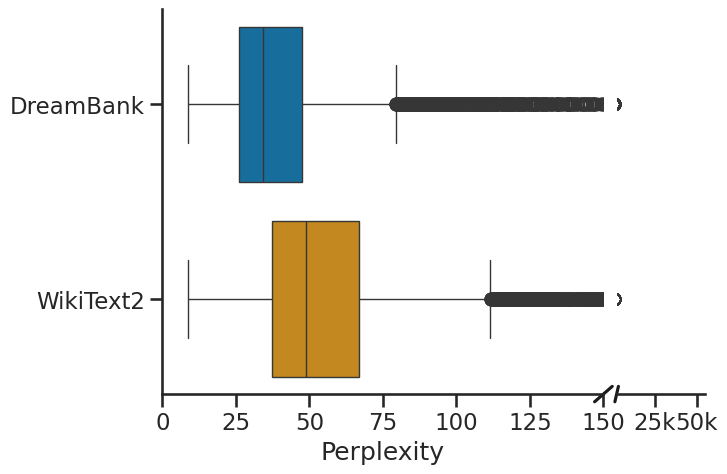

In [10]:
sns.set_theme(context='talk', style='ticks')
f, (ax_left, ax_right) = plt.subplots(
    ncols=2,
    nrows=1,
    gridspec_kw={'wspace':0.05, 'width_ratios': [5, 1]},
    figsize=(7,5)
)

ax_right.figsize = (2, 2)
g_right = sns.boxplot(
    data=full_dataset_df,
    x="gpt2_perplexities",
    y="Data",
    hue='Data',
    ax=ax_right,
    dodge=False,
    palette='colorblind'
)

g_right.set_xlim(2000, 55000)
sns.despine(ax=g_right)

g_left = sns.boxplot(
    data=full_dataset_df,
    x="gpt2_perplexities",
    y="Data",
    hue='Data',
    ax=ax_left,
    dodge=False,
    palette='colorblind'
)

sns.despine(ax=ax_left)
g_left.set_xlabel(""), g_right.set_xlabel("")
g_left.set_xlim(0,150)
g_right.axes.get_yaxis().set_visible(False)
sns.despine(ax=g_right, left=True)

g_right.set_xticklabels(
    ["{}k".format(str(x/1000).replace(".0", "")) for x in g_right.get_xticks()]
)

ax = ax_right
d = .020  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

ax2 = ax_left
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # bottom-left diagonal

g_left.set_ylabel(""), g_left.set_xlabel("Perplexity")

if SAVE_images:
    plt.savefig(
        "Images/wiki_db_reports_ppl_box.pdf",
        dpi=400,
        bbox_inches='tight'
    )

plt.show()

In [11]:
mdl_nms_dct

{'gpt2': 'GPT2',
 'gpt2-medium': 'GPT2-Medium',
 'gpt2-large': 'GPT2-Large',
 'gpt2-xl': 'GPT2-XL',
 'OLMo-1B': 'OLMo-1B',
 'OLMo-7B': 'OLMo-7B'}

In [12]:
model_dataset_lst = []
for mdl_id, mdl_nm in mdl_nms_dct.items():
    lcl_mdl_df = full_dataset_df[['No.Words', 'Data', 'Text', f'{mdl_id}_perplexities']]
    lcl_mdl_df = lcl_mdl_df.rename(columns={f'{mdl_id}_perplexities': "perplexities"})
    lcl_mdl_df['Model'] = [mdl_nm] * len(lcl_mdl_df)
    lcl_mdl_df['Model Size (M)'] = [mdl_prmtrs_dct[mdl_id]] * len(lcl_mdl_df)

    model_dataset_lst.append(lcl_mdl_df)

model_dataset_df = pd.concat(model_dataset_lst).reset_index(drop=True)

In [13]:
model_dataset_df.sample(5)

,No.Words,Data,Text,perplexities,Model,Model Size (M)
163069,101,WikiText2,Condoms are widely recommended for the preven...,6.914779,OLMo-7B,6890
132205,187,WikiText2,There are a number of important arterial road...,28.460087,OLMo-1B,1180
46918,80,WikiText2,"By the end of 1963 , Dylan felt both manipula...",38.821556,GPT2-Medium,380
93853,245,DreamBank,"My husband, my daughter, and I were taking a t...",13.636054,GPT2-XL,1610
147045,113,DreamBank,"I am in my mother's room, trying to phone Mary...",16.510307,OLMo-7B,6890


/tmp/ipykernel_1666/401034043.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g_right.set_xticklabels(


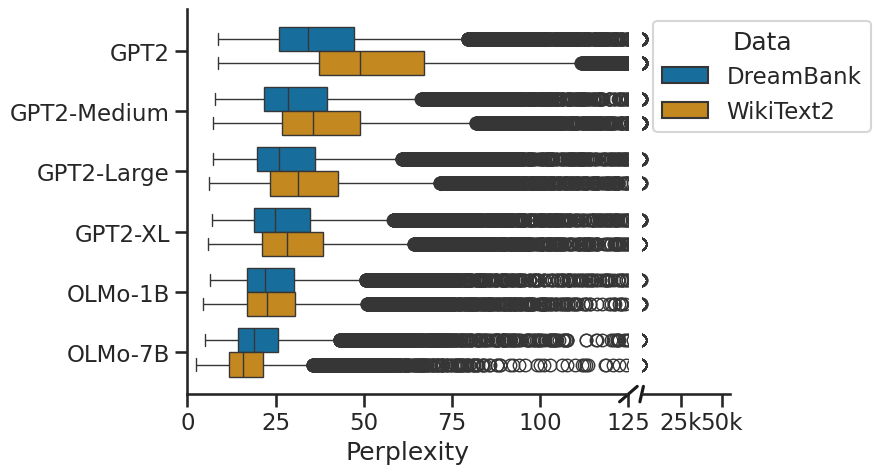

In [14]:
sns.set_theme(context='talk', style='ticks')
f, (ax_left, ax_right) = plt.subplots(
    ncols=2,
    nrows=1,
    gridspec_kw={'wspace':0.05, 'width_ratios': [5, 1]},
    figsize=(7,5)
)

ax_right.figsize = (2, 2)
g_right = sns.boxplot(
    data=model_dataset_df,
    x="perplexities",
    hue="Data",
    y='Model',
    ax=ax_right,
    palette='colorblind'
)

g_right.set_xlim(1000, 55000)
sns.despine(ax=g_right)

g_left = sns.boxplot(
    data=model_dataset_df,
    x="perplexities",
    hue="Data",
    y='Model',
    ax=ax_left,
    palette='colorblind',
    legend=None,
)

sns.despine(ax=ax_left)
g_left.set_xlabel(""), g_right.set_xlabel("")
g_left.set_xlim(0,125)
g_right.axes.get_yaxis().set_visible(False)
sns.despine(ax=g_right, left=True)

g_right.set_xticklabels(
    ["{}k".format(str(x/1000).replace(".0", "")) for x in g_right.get_xticks()]
)

ax = ax_right
d = .020  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

ax2 = ax_left
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # bottom-left diagonal

g_left.set_ylabel(""), g_left.set_xlabel("Perplexity")

if SAVE_images:
    plt.savefig(
        "Images/wiki_db_reports_ppl_box.pdf",
        dpi=400,
        bbox_inches='tight'
    )

plt.show()

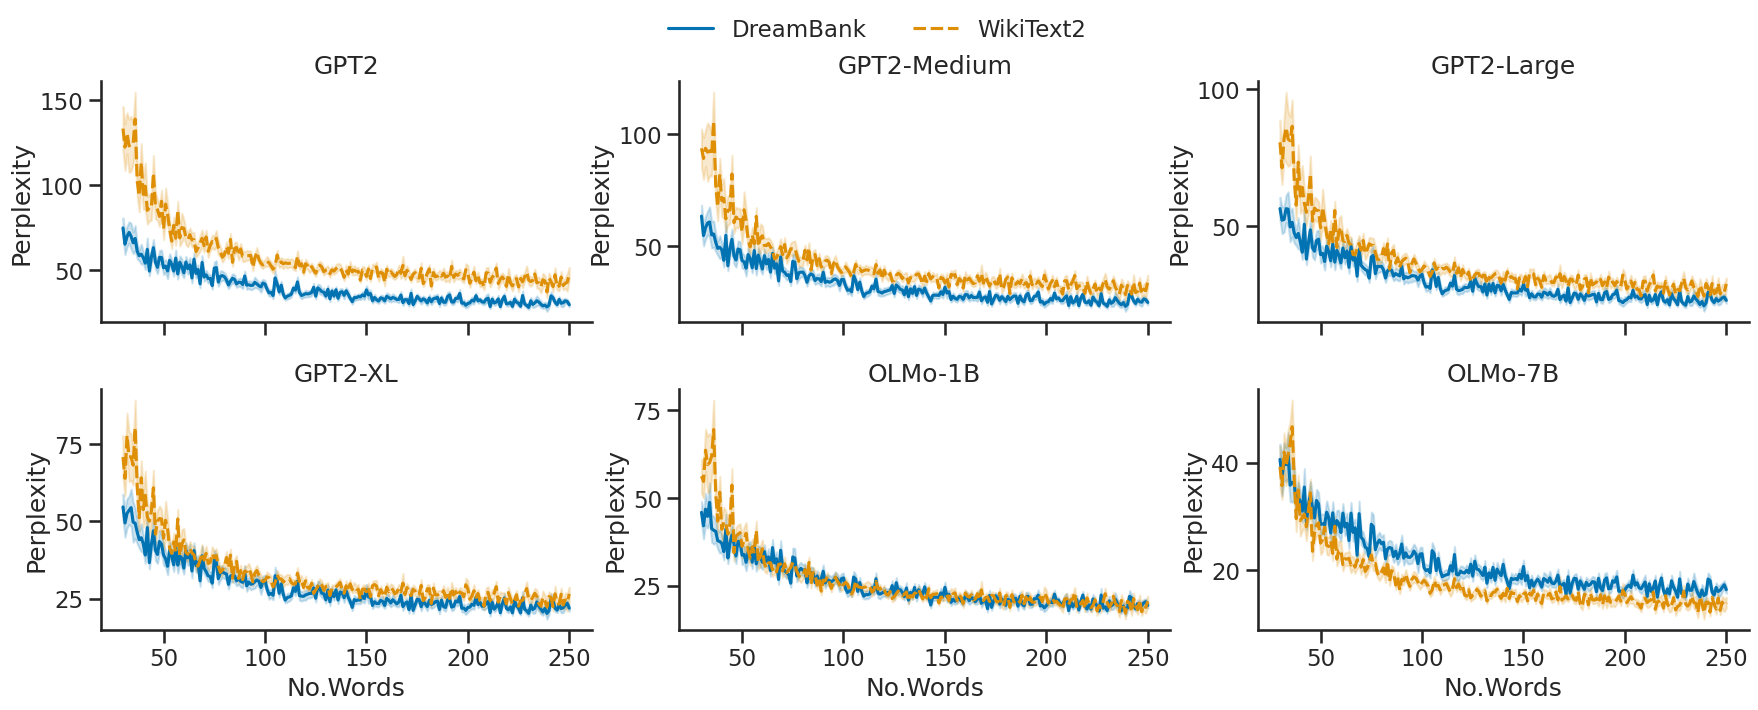

In [15]:
sns.set_theme(context='talk', style='ticks')

# plt.figure(figsize=(8,5))
hgt = 3.5

g = sns.relplot(
    data=model_dataset_df,
    y="perplexities",
    x="No.Words",
    hue="Data",
    style="Data",
    errorbar=("se", 1),
    kind='line',
    col='Model',
    col_wrap=3,
    facet_kws={'sharey': False, 'sharex': True},
    height=hgt,
    aspect=6/hgt,
    palette='colorblind',
)

g.set(ylabel='Perplexity')

g.set_titles(template='{col_name}')

sns.despine(right=True, top=True)

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.45, .95), ncol=3, title=None, frameon=False,
)

sns.set(font_scale=2)

if SAVE_images:
    plt.savefig(
        "Images/nowds_ppl_linelot_mdls.pdf",
        dpi=400,
        bbox_inches='tight'
    )

plt.show()

Random permuatation test comparing PPL scores for dreams reports and Wiki articles produced by different models.

In [18]:
rho_data = []
for mdl_id, mdl_nm in mdl_nms_dct.items():
    rho, p = stats.spearmanr(
            full_dataset_df[full_dataset_df["Data"].isin(["DreamBank"])][f"{mdl_id}_perplexities"],
            full_dataset_df[full_dataset_df["Data"].isin(["DreamBank"])]["No.Words"],
    )

    print(f'Model: {mdl_nm}: rho: {rho} p:{p}')
    rho_data.append([f'{mdl_nm}_data_PPL_permutation', p, rho])

rho_data_df = pd.DataFrame(
    rho_data,
    columns=['Model', 'p', 'rho']
)

rho_data_df.to_csv('WPvsDB_pplnwd_corr_results.csv', index=False)

Model: GPT2: rho: -0.3268580085667411 p:0.0
Model: GPT2-Medium: rho: -0.33222653406815217 p:0.0
Model: GPT2-Large: rho: -0.33880636570772077 p:0.0
Model: GPT2-XL: rho: -0.34103081140128405 p:0.0
Model: OLMo-1B: rho: -0.35461744860232364 p:0.0
Model: OLMo-7B: rho: -0.38313919238414784 p:0.0


In [16]:
rand_perm_data = []
for mdl_id, mdl_nm in mdl_nms_dct.items():
    data_ppl_p = permutation_test(
        full_dataset_df[full_dataset_df["Data"].isin(["WikiText2"])][f"{mdl_id}_perplexities"],
        full_dataset_df[full_dataset_df["Data"].isin(["DreamBank"])][f"{mdl_id}_perplexities"],
        method='approximate',
        num_rounds=10000,
        seed=0
    )

    print(f'Model: {mdl_nm}: p:{data_ppl_p}')
    rand_perm_data.append([f'{mdl_nm}_data_PPL_permutation', data_ppl_p])

rand_perm_data_df = pd.DataFrame(
    rand_perm_data,
    columns=['Model', 'p']
)

rand_perm_data_df.to_csv('WPvsDB_rand_perm_results.csv', index=False)

Model: GPT2: p:9.999000099990002e-05
Model: GPT2-Medium: p:9.999000099990002e-05
Model: GPT2-Large: p:9.999000099990002e-05
Model: GPT2-XL: p:9.999000099990002e-05
Model: OLMo-1B: p:0.273972602739726
Model: OLMo-7B: p:9.999000099990002e-05


In [18]:
# Statistical analysis: Peacock test
Peacock_data = []

for mdl_id, mdl_nm in mdl_nms_dct.items():
    wk_nwd, wk_ppl = zip(*full_dataset_df[
        full_dataset_df["Data"].isin(["WikiText2"])
    ][["No.Words", f"{mdl_id}_perplexities"]].values)

    db_nwd, db_ppl = zip(*full_dataset_df[
        full_dataset_df["Data"].isin(["DreamBank"])
    ][["No.Words", f"{mdl_id}_perplexities"]].values)

    # 2D KS
    p, D = ndtest.ks2d2s(wk_nwd, wk_ppl, db_nwd, db_ppl, extra=True)
    Peacock_data.append([f'{mdl_nm}_Peacock_data', p, D])

    print(f"Model: {mdl_nm}; p: {p}; D: {D}")

Peacock_data_df = pd.DataFrame(
    Peacock_data,
    columns=['Model', 'p', 'D']
)

Peacock_data_df.to_csv('WPvsDB_peacock_test_results.csv', index=False)

Model: GPT2; p: 0.0; D: 0.34119531193128066
Model: GPT2-Medium; p: 6.229548716344617e-211; D: 0.23043604862779354
Model: GPT2-Large; p: 6.904986144084121e-159; D: 0.1998616874135547
Model: GPT2-XL; p: 1.847369482214316e-94; D: 0.1539637475431317
Model: OLMo-1B; p: 5.636682337459764e-27; D: 0.08175001819902455
Model: OLMo-7B; p: 1.7207729001906627e-117; D: 0.17147120914318992


## Full-dataset Perplexity

In [20]:
ppl_overall = pd.read_csv('full_datasets_ppl.csv')

ppl_overall['Model Size (M)'] = [mdl_prmtrs_dct[mdl] for mdl in ppl_overall.Model.values]
ppl_overall['Length'] = [L/1000000 for L in ppl_overall.Length.values]
ppl_overall['Original PPL'] = [
    mdl_ppl_org.get(mdl, '-') if dt == 'WikiText2' else '-'
    for mdl, dt in ppl_overall[['Model', 'Data']].values
]

ppl_overall['Model'] = [mdl_nms_dct[mdl] for mdl in ppl_overall.Model.values]

In [21]:
ppl_overall.round(1)

,Data,Model,Perplexity,Length,Model Size (M),Original PPL
0,DreamBank,GPT2,31.9,1.4,137,-
1,WikiText2,GPT2,27.4,1.7,137,29.41
2,DreamBank,GPT2-Medium,26.7,1.4,380,-
3,WikiText2,GPT2-Medium,20.0,1.7,380,22.76
4,DreamBank,GPT2-Large,24.2,1.4,812,-
5,WikiText2,GPT2-Large,17.2,1.7,812,19.93
6,DreamBank,GPT2-XL,22.9,1.4,1610,-
7,WikiText2,GPT2-XL,15.5,1.7,1610,18.34
8,DreamBank,OLMo-1B,19.9,1.4,1180,-
9,WikiText2,OLMo-1B,12.4,1.7,1180,-


In [22]:
print(ppl_overall.round(1).to_latex())

\begin{tabular}{lllrrrl}
\toprule
 & Data & Model & Perplexity & Length & Model Size (M) & Original PPL \\
\midrule
0 & DreamBank & GPT2 & 31.900000 & 1.400000 & 137 & - \\
1 & WikiText2 & GPT2 & 27.400000 & 1.700000 & 137 & 29.410000 \\
2 & DreamBank & GPT2-Medium & 26.700000 & 1.400000 & 380 & - \\
3 & WikiText2 & GPT2-Medium & 20.000000 & 1.700000 & 380 & 22.760000 \\
4 & DreamBank & GPT2-Large & 24.200000 & 1.400000 & 812 & - \\
5 & WikiText2 & GPT2-Large & 17.200000 & 1.700000 & 812 & 19.930000 \\
6 & DreamBank & GPT2-XL & 22.900000 & 1.400000 & 1610 & - \\
7 & WikiText2 & GPT2-XL & 15.500000 & 1.700000 & 1610 & 18.340000 \\
8 & DreamBank & OLMo-1B & 19.900000 & 1.400000 & 1180 & - \\
9 & WikiText2 & OLMo-1B & 12.400000 & 1.700000 & 1180 & - \\
10 & DreamBank & OLMo-7B & 16.500000 & 1.400000 & 6890 & - \\
11 & WikiText2 & OLMo-7B & 8.700000 & 1.700000 & 6890 & - \\
\bottomrule
\end{tabular}



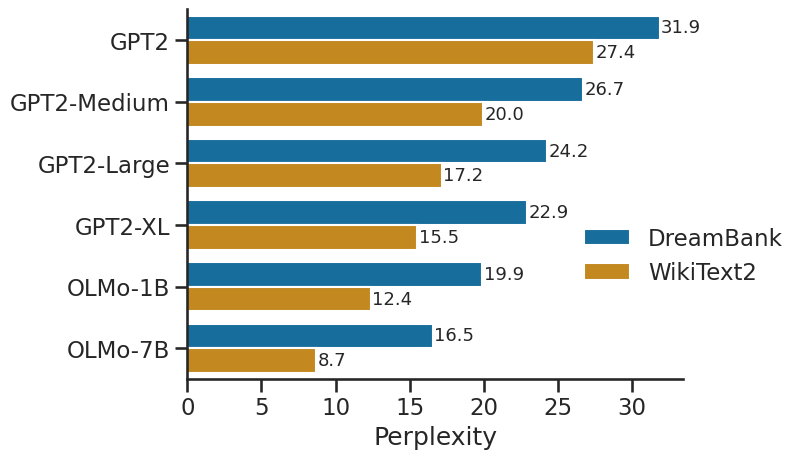

In [23]:
sns.set_theme(context='talk', style='ticks')

g = sns.barplot(
    data=ppl_overall,
    x="Perplexity",
    hue="Data",
    y="Model",
    palette='colorblind',
)

for c in g.containers:
    # set the bar label
    g.bar_label(c, fmt='%.1f', label_type='edge', padding=1, fontsize=13)

sns.despine()

g.set(ylabel='')

sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(1, .2), ncol=1, title=None, frameon=False,
)

plt.savefig(
    f"Images/db_wiki_ppl_whole_bar.pdf",
    dpi=400,
    bbox_inches='tight'
)

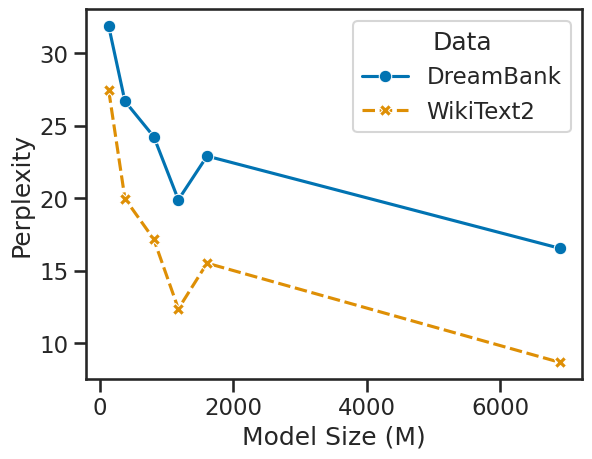

In [24]:
g = sns.lineplot(
    data=ppl_overall,
    y="Perplexity",
    hue="Data",
    x="Model Size (M)",
    palette='colorblind',
    markers=True,
    style='Data',
)